In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import signal

from neurokit2.ecg import ecg_findpeaks

from os.path import abspath
from os import listdir
import sys

home_path = "C:\\sebin\\lab\\ecg"
git_path = home_path+"\\ecg_data_wfdb"
sys.path.append(git_path)


In [2]:
path = abspath("C:\sebin\lab\ecg\save\philips") 

In [28]:
output_path = abspath("C:\sebin\lab\ecg\save\philip")

# open csv + 전처리
---

In [3]:
ecg_files = listdir(path)

In [4]:
data = []

In [5]:
for name in ecg_files:
    data.append(pd.read_csv(path+"\\"+name)[0:5000].to_numpy())

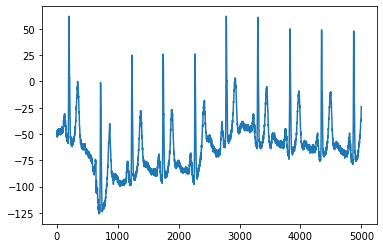

In [6]:
plt.plot(data[0])

In [7]:
len(data)

143

In [8]:
len(data[0])

5000

In [9]:
data[0].shape

(5000, 1)

# down sampling
---

In [10]:
resample=[]

In [11]:
for i in range(len(data)):
    resample.append(signal.resample(data[i],3600))

In [12]:
resample[0].shape

(3600, 1)

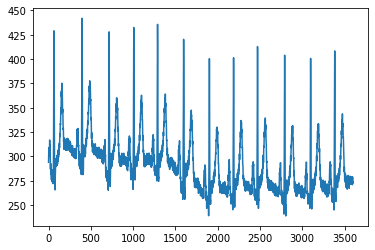

In [13]:
plt.plot(resample[20])

In [14]:
len(resample[20])

3600

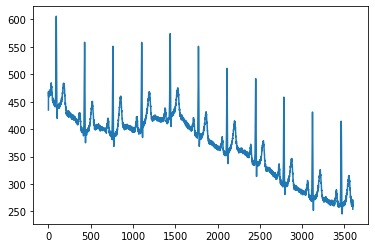

In [15]:
plt.plot(resample[-1])

In [16]:
len(resample[-1])

3600

# r peak detection
---

In [17]:
rpeak = []

In [18]:
for i in range(len(data)):
    resample[i] = resample[i].flatten()
    rpeak.append(signal.find_peaks(resample[i],distance=250))

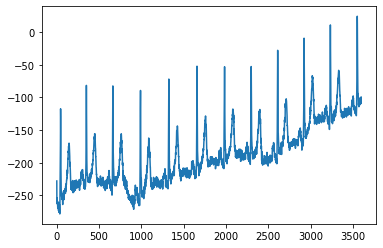

In [19]:
plt.plot(resample[1])

In [20]:
rpeak[1]

(array([  45,  350,  663,  990, 1325, 1658, 1984, 2299, 2612, 2924, 3235,
        3553], dtype=int64),
 {})

In [24]:
rpeak[20][0]

array([  64,  396,  716, 1008, 1289, 1597, 1902, 2188, 2471, 2792, 3099,
       3384], dtype=int64)

# ecg segmentation

In [30]:
seg = []

In [36]:
for i in range(len(resample)):
    for j in range(len(rpeak[i][0])):
        start = rpeak[i][0][j]-144
        r = rpeak[i][0][j]
        end = rpeak[i][0][j]+144

        if start < 0:
            continue
        if end >= 3600:
            continue

        seg = resample[i][start:end]
        seg = pd.DataFrame(seg)
        seg.to_csv(output_path+"\\"+str(i)+"_"+str(j)+".csv",header=False,index=False)
        